In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [45]:
import pandas as pd

#import deepspeed
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
#from transformers_xl import XLNetLMHeadModel
from datasets import load_dataset
#from transformers.integrations import TensorBoardCallback
import re
from emoji import demojize
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download stop word lists if not already present



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [47]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [48]:
df['target'].value_counts(normalize='true')

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

In [49]:
import emoji

In [50]:
def remove_urls(text):
  pattern = r"(https?://)?(www\.)?(\S+\.\S+)(/\S*)?"
  return re.sub(pattern, "", text)


In [51]:
def remove_punctuation(text):
    return re.sub(r"[^\w\s]", "", text)

In [52]:
data = df[['text', 'target']]

In [53]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [54]:
#tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")

In [55]:
def preprocess(data):
    """
    Performs basic preprocessing on a tweet text:
    - Replace emojis with their meaning using demojize
    - Remove punctuation
    - Remove stop words like "a", "the", "in"
    """
    texts = data['text']
    labels = data['target']
    
    # Remove urls
    pattern = r"(https?://)?(www\.)?(\S+\.\S+)(/\S*)?"
    texts = [re.sub(pattern, "", text) for text in texts]
    
    # Replace emojis with meaning
    texts = [emoji.demojize(text) for text in texts] 
    #text = remove_urls_complete(text)
    
    # Remove punctuation
    texts = [re.sub(r"[^\w\s]", "", text) for text in texts]

    stop_words = set(stopwords.words('english'))
    #words = text.split()]
    #filtered_words = [word for word in words if word not in stop_words]
    #text = " ".join(filtered_words)
    
    texts = [
        " ".join([word for word in text.split() if word not in stop_words])
        for text in texts
    ]
    
    texts = [text.lower() for text in texts]
    
    #tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
    #tokenized_inputs = tokenizer(texts, truncation=True, padding="max_length")
    #processed_texts.append(processed_text)
    return texts#{"input_ids": tokenized_inputs["input_ids"], "attention_mask": tokenized_inputs["attention_mask"], "labels": labels}

# Example usage
#tweet = "This movie was  so much fun! #comedy #mustwatch 🍞🍖 ain't http://t.co/o9qknbfOFXI  "
#cleaned_tweet = preprocess_function(tweet)
#print(cleaned_tweet)  # Output: "movie much fun comedy mustwatch"

In [56]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [57]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [59]:
predicted_label = int(output.logits.squeeze(0).argmax(-1))  # Get class with highest score
predicted_score = output.logits.squeeze(0)[predicted_label]

AttributeError: 'BaseModelOutputWithPoolingAndCrossAttentions' object has no attribute 'logits'

In [ ]:
def preprocess(data):
    """
    Performs basic preprocessing on a tweet text:
    - Replace emojis with their meaning using demojize
    - Remove punctuation
    - Remove stop words like "a", "the", "in"
    """
    texts = data['text']
    labels = data['target']
    
    # Remove urls
    pattern = r"(https?://)?(www\.)?(\S+\.\S+)(/\S*)?"
    texts = [re.sub(pattern, "", text) for text in texts]
    
    # Replace emojis with meaning
    texts = [emoji.demojize(text) for text in texts] 
    #text = remove_urls_complete(text)
    
    # Remove punctuation
    texts = [re.sub(r"[^\w\s]", "", text) for text in texts]

    stop_words = set(stopwords.words('english'))
    #words = text.split()]
    #filtered_words = [word for word in words if word not in stop_words]
    #text = " ".join(filtered_words)
    
    texts = [
        " ".join([word for word in text.split() if word not in stop_words])
        for text in texts
    ]
    
    texts = [text.lower() for text in texts]
    data['text'] = texts
    
    #tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
    #tokenized_inputs = tokenizer(texts, truncation=True, padding="max_length")
    #processed_texts.append(processed_text)
    return data#{"input_ids": tokenized_inputs["input_ids"], "attention_mask": tokenized_inputs["attention_mask"], "labels": labels}

# Example usage
#tweet = "This movie was  so much fun! #comedy #mustwatch 🍞🍖 ain't http://t.co/o9qknbfOFXI  "
#cleaned_tweet = preprocess_function(tweet)
#print(cleaned_tweet)  # Output: "movie much fun comedy mustwatch"

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt',truncation=True, padding="max_length")
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
scores

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest").to(device)
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

In [ ]:
model.config.num_labels = 2

In [ ]:
list(df['text'])[:5]

In [ ]:
train_texts = list(data['text'])
train_labels = list(data['target'])

In [ ]:
train_encodings = tokenizer(train_texts, return_tensors="pt", padding=True, truncation=True)

In [ ]:
import torch
from torch import optim

optimizer = optim.AdamW(model.parameters(), lr=5e-5)  # Example learning rate
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
num_epochs = 5

In [ ]:
for epoch in range(num_epochs):
    for text, label in zip(train_texts, train_labels):
       # inputs = {
        #    "input_ids": tokens.to(device),
         #   "attention_mask": attention_mask.to(device),
            # ... other necessary input tensors
        #}
        encoded_text = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        inputs = encoded_text.to(device)
        
       # inputs = {
        #    "input_ids": encoded_text["input_ids"],
            #"attention_mask": encoded_text["attention_mask"],
            
        #}
        
        outputs = model(**inputs, labels=torch.tensor([label]))
        #loss = outputs.loss
        loss = loss_fn(outputs.logits, torch.tensor([label]).to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'epoch {epoch} got loss {loss}')

In [60]:
data.iloc[1]

text      Forest fire near La Ronge Sask. Canada
target                                         1
Name: 1, dtype: object

In [ ]:
from scipy.special import softmax

In [ ]:
data[data['target']==0].head(10)

In [ ]:
text = 'London is cool'
inpu =  tokenizer(text, return_tensors="pt").to(device)

output = model(**inpu)

scores = output[0][0].detach().cpu().numpy()

In [ ]:
scores

In [ ]:
logits = output.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)

In [ ]:
probabilities

In [ ]:
predicted_class = probabilities.argmax(dim=-1).item()  # Get the index of the highest probability
predicted_sentiment = "Positive" if predicted_class == 1 else "Negative"

In [ ]:
predicted_sentiment

In [ ]:
text = "Good night 😊"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt',truncation=True, padding="max_length")
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [ ]:
df.head()

In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(data)

In [ ]:
processed_dataset = dataset.map(preprocess_function, batched=True)

In [ ]:
processed_dataset

In [ ]:
train_dataset, eval_dataset = processed_dataset.train_test_split(test_size=0.2) 

In [ ]:
processed_dataset = preprocess_function(data)

In [ ]:
first_five = []
for key, value in processed_dataset.items():
    if len(first_five) < 1:
        first_five.append(value)
    else:
        break

In [ ]:
first_five

In [ ]:
import pandas as pd

#import deepspeed
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
#from transformers_xl import XLNetLMHeadModel
from datasets import load_dataset
#from transformers.integrations import TensorBoardCallback
import re
from emoji import demojize
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download stop word lists if not already present



In [ ]:
from transformers import XLNetLMHeadModel, AutoModelForSequenceClassification

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("allenai/longformer-base-4096")

In [ ]:
training_args = TrainingArguments(
    output_dir="output",
    overwrite_output_dir=True,
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    fp16=True,
    #deepspeed=deepspeed_config,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    #compute_metrics=compute_loss,  # Replace with your custom metric function
    #callbacks=[TensorBoardCallback()],
)

In [ ]:
trainer.train()

In [ ]:
!pip install simpletransformers

In [ ]:
from simpletransformers.classification import ClassificationModel

In [ ]:
# Load a pre-trained model and fine-tune it with SimpleTransformers
model = ClassificationModel(
    "roberta", "roberta-base", use_cuda=True,  # Use GPU if available
    args={"learning_rate": 5e-5, "evaluate_during_training": True, "evaluate_during_training_verbose": True},
)

# Train the model with curriculum learning (example)


In [ ]:
model.train_model(train_dataset, eval_df =  eval_dataset, overwrite_output_dir=True, curriculum_learning=True)

In [ ]:
from transformers import pipeline

In [ ]:
distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    return_all_scores=True
)

In [ ]:
distilled_student_sentiment_classifier ("I love this movie and i would watch it again and again!")

In [72]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model.config
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
import torch
from torch import optim

In [ ]:
model.config.num_labels = 2

In [ ]:
optimizer = optim.AdamW(model.parameters(), lr=5e-5)  # Example learning rate
loss_fn = torch.nn.CrossEntropyLoss()
num_epochs = 5

In [ ]:
data = preprocess(data)

In [95]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [98]:
data['target'] = data['target'].apply(lambda x: 1 if x==0 else 0)

/tmp/ipykernel_26/596488809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].apply(lambda x: 1 if x==0 else 0)


In [99]:
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,0
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are ...,0
3,"13,000 people receive #wildfires evacuation or...",0
4,Just got sent this photo from Ruby #Alaska as ...,0


In [100]:
def process_data(data, tokenizer, max_len):
    """Processes text data into input tensors."""

    processed_data = []
    for index in range(len(data)):
        title = str(data.text[index])
        title = " ".join(title.split())

        inputs = tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        processed_data.append({
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'targets': torch.tensor(data.target[index], dtype=torch.long)
        })

    return processed_data

In [101]:
train_size = 0.8
train_dataset=data.sample(frac=train_size,random_state=200)
test_dataset=data.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(data.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = process_data(train_dataset, tokenizer, 160)
testing_set = process_data(test_dataset, tokenizer, 160)

FULL Dataset: (7613, 2)
TRAIN Dataset: (6090, 2)
TEST Dataset: (1523, 2)


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [102]:
from torch.utils.data import DataLoader
#Passing the data to variable with DataLoader
train_params = {'batch_size': 4,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': 2,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [103]:
train_dataset['target'].value_counts()

target
1    3477
0    2613
Name: count, dtype: int64

In [104]:
test_dataset['target'].value_counts()

target
1    865
0    658
Name: count, dtype: int64

In [105]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=1e-05)

In [106]:
def calcuate_accu(big_idx, targets):
    n_correct = (big_idx==targets).sum().item()
    return n_correct

In [107]:
def calculate_roc_curve(outputs,targets):
    #taking the probability form
    probabilities = torch.nn.functional.softmax(outputs)
    #taking the positive class(1), and transforming in numpy
    prob_nump = probabilities[:,1].cpu().clone().detach().numpy()
    target_nump = targets.cpu().clone().detach().numpy()
    return prob_nump,target_nump

In [108]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0 ; tr_loss = 0 ; nb_tr_examples = 0 ; nb_tr_steps = 0;class1 = [];target_np=[]
    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            
            outputs = model(ids, mask)
            logits = outputs.logits
            loss = loss_function(logits, targets)
            tr_loss += loss.item()
            
            big_val, big_idx = torch.max(logits.data, dim=1)
            n_correct += calcuate_accu(big_idx, targets)
            
            #function to calculate roc curve
            class1_batch,target_batch_np = calculate_roc_curve(logits,targets)
            #taking the values in a vector
            class1 = np.append(class1,class1_batch)
            target_np = np.append(target_np,target_batch_np)
            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 5000 steps: {loss_step}")
                print(f"Validation Accuracy per 5000 steps: {accu_step}")
    
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    return epoch_accu,class1,target_np

In [109]:
acc,class1,target_np = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

/tmp/ipykernel_26/3104628365.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = torch.nn.functional.softmax(outputs)


Validation Loss per 5000 steps: 1.6885831356048584
Validation Accuracy per 5000 steps: 0.0
Validation Loss Epoch: 1.58599743829781
Validation Accuracy Epoch: 16.08667104399212
Accuracy on test data = 16.09%


In [86]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [110]:
# Paderameters to make the roc curve
fpr, tpr, thresholds = metrics.roc_curve(target_np, class1)

#AUC calculation
roc_auc = metrics.auc(fpr, tpr)


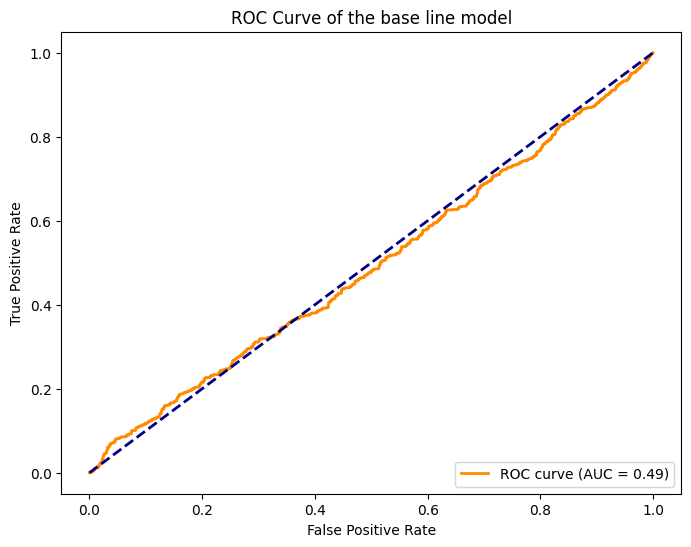

In [111]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the base line model')
plt.legend(loc='lower right')
plt.show()

In [117]:
# Defining the training function on the 30% of the dataset for tuning the distilbert model
def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in enumerate(training_loader, 0):
         #taking the inputs and label
        ids = data['ids'].to(device, dtype=torch.long)
        mask = data['mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.long)
        #using the model
        outputs = model(ids, mask)
        logits = outputs.logits
        #applying the loss function 
        loss = loss_function(logits, targets)
        #sum the loss of the batch
        tr_loss += loss.item()
        # take the value and index of the max of the tensor
        big_val, big_idx = torch.max(logits.data, dim=1)
        n_correct += calcuate_accu(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
           # print(f"Training Loss per 5000 steps: {loss_step}")
            #print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return 

In [118]:
for epoch in range(25):
    train(epoch)

The Total Accuracy for Epoch 0: 96.65024630541872
Training Loss Epoch: 0.0979924868634336
Training Accuracy Epoch: 96.65024630541872
The Total Accuracy for Epoch 1: 97.24137931034483
Training Loss Epoch: 0.07959284107776762
Training Accuracy Epoch: 97.24137931034483
The Total Accuracy for Epoch 2: 97.73399014778325
Training Loss Epoch: 0.057417159720840855
Training Accuracy Epoch: 97.73399014778325
The Total Accuracy for Epoch 3: 97.78325123152709
Training Loss Epoch: 0.05869609216019528
Training Accuracy Epoch: 97.78325123152709
The Total Accuracy for Epoch 4: 98.04597701149426
Training Loss Epoch: 0.050550027682049
Training Accuracy Epoch: 98.04597701149426
The Total Accuracy for Epoch 5: 98.47290640394088
Training Loss Epoch: 0.03658657126434694
Training Accuracy Epoch: 98.47290640394088
The Total Accuracy for Epoch 6: 98.16091954022988
Training Loss Epoch: 0.04072594076816171
Training Accuracy Epoch: 98.16091954022988
The Total Accuracy for Epoch 7: 98.63711001642037
Training Loss 

In [92]:
acc,class1_fn,target_np_fn = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

/tmp/ipykernel_26/3104628365.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = torch.nn.functional.softmax(outputs)


Validation Loss per 5000 steps: 1.5782604217529297
Validation Accuracy per 5000 steps: 0.0
Validation Loss Epoch: 1.4481926619654566
Validation Accuracy Epoch: 23.703217334208798
Accuracy on test data = 23.70%


In [119]:
acc,class1_fn,target_np_fn = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

/tmp/ipykernel_26/3104628365.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = torch.nn.functional.softmax(outputs)


Validation Loss per 5000 steps: 0.00025638623628765345
Validation Accuracy per 5000 steps: 100.0
Validation Loss Epoch: 1.0547588350046033
Validation Accuracy Epoch: 82.07485226526592
Accuracy on test data = 82.07%


In [114]:
acc,class1_fn,target_np_fn = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

/tmp/ipykernel_26/3104628365.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probabilities = torch.nn.functional.softmax(outputs)


Validation Loss per 5000 steps: 0.0015237824991345406
Validation Accuracy per 5000 steps: 100.0
Validation Loss Epoch: 0.5925206410294271
Validation Accuracy Epoch: 81.4182534471438
Accuracy on test data = 81.42%


In [120]:
# Parameters to make the roc curve
fpr_fn, tpr_fn, thresholds_fn = metrics.roc_curve(target_np_fn, class1_fn)

#AUC calculation
roc_auc = metrics.auc(fpr_fn, tpr_fn)


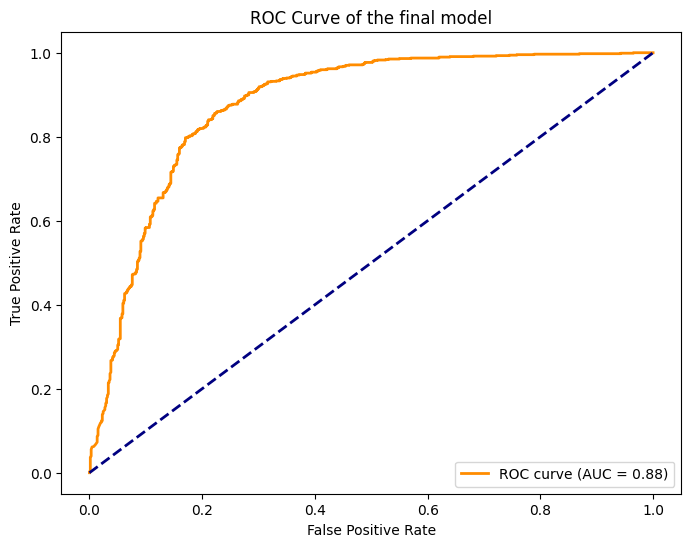

In [121]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_fn, tpr_fn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the final model')
plt.legend(loc='lower right')
plt.show()

In [124]:
def preprocess(data):
    """
    Performs basic preprocessing on a tweet text:
    - Replace emojis with their meaning using demojize
    - Remove punctuation
    - Remove stop words like "a", "the", "in"
    """
    texts = data['text']
    #labels = data['target']
    
    # Remove urls
    pattern = r"(https?://)?(www\.)?(\S+\.\S+)(/\S*)?"
    texts = [re.sub(pattern, "", text) for text in texts]
    
    # Replace emojis with meaning
    texts = [emoji.demojize(text) for text in texts] 
    #text = remove_urls_complete(text)
    
    # Remove punctuation
    texts = [re.sub(r"[^\w\s]", "", text) for text in texts]

    stop_words = set(stopwords.words('english'))
    #words = text.split()]
    #filtered_words = [word for word in words if word not in stop_words]
    #text = " ".join(filtered_words)
    
    texts = [
        " ".join([word for word in text.split() if word not in stop_words])
        for text in texts
    ]
    
    texts = [text.lower() for text in texts]
    data['text'] = texts
    
    #tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
    #tokenized_inputs = tokenizer(texts, truncation=True, padding="max_length")
    #processed_texts.append(processed_text)
    return data#{"input_ids": tokenized_inputs["input_ids"], "attention_mask": tokenized_inputs["attention_mask"], "labels": labels}

# Example usage
#tweet = "This movie was  so much fun! #comedy #mustwatch 🍞🍖 ain't http://t.co/o9qknbfOFXI  "
#cleaned_tweet = preprocess_function(tweet)
#print(cleaned_tweet)  # Output: "movie much fun comedy mustwatch"

In [122]:
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [123]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [126]:
df_test = preprocess(df_test)

In [127]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,just happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills 28 china taiwan


In [129]:
def process_data_test(data, tokenizer, max_len):
    """Processes text data into input tensors."""

    processed_data = []
    for index in range(len(data)):
        title = str(data.text[index])
        title = " ".join(title.split())

        inputs = tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_token_type_ids=True,
            truncation=True
        )

        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        processed_data.append({
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            #'targets': torch.tensor(data.target[index], dtype=torch.long)
        })

    return processed_data

In [133]:
data_test = df_test['text']

In [135]:
test_set = process_data(train_dataset, tokenizer, 160)
from torch.utils.data import DataLoader
#Passing the data to variable with DataLoader

test_params = {'batch_size': 2,
                'shuffle': True,
                'num_workers': 0
                }

test_loader = DataLoader(test_set, **test_params)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [190]:
def predict(model, new_data, tokenizer, max_len):
    #processed_data = process_data_test(new_data, tokenizer, max_len)
    #model.eval()  # Set model to evaluation mode
    data = {}

    with torch.no_grad():
        for data in new_data:
            ids = data['ids']#.to(device)  # Move data to device (if using GPU)
            mask = data['mask']#.to(device)

            outputs = model(ids, mask)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)  # For probabilities

            # Get predicted class index (you can also use probabilities)
            predicted_class = torch.argmax(probabilities, dim=1).item()

            # Add label to DataFrame (adapt based on your desired format)
            data['predicted_label'] = predicted_class

    return data  # Return DataFrame with predicted labels

#new_data = pd.DataFrame({'text': ["New text 1", "New text 2"]})
predicted_data = predict(model, test_loader, tokenizer, 160)
print(predicted_data)

TypeError: 'collections.OrderedDict' object is not callable

In [141]:
data = pd.Series()

In [149]:
data

predicted_value    3
dtype: int64

In [148]:
data['predicted_value']+= 1

In [145]:
data['predicted_value'] = 2

In [183]:
def predict_for_new_data(data, tokenizer, model):
    # Preprocess data (e.g., tokenize)
    processed_data = tokenizer(data, padding=True, truncation=True, return_tensors="pt")
    ids = processed_data['input_ids'].to(device)
    mask = processed_data['attention_mask'].to(device)

    # Pass through model and get predictions
    with torch.no_grad():
        outputs = model(ids, mask)

        # If model has multiple outputs, select the one with predictions
        if isinstance(outputs, tuple):
            logits = outputs[0]  # Assuming predictions are in the first element
        else:
            logits = outputs.logits

        # Process predictions
        predictions = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

    return predictions

In [184]:
data = [" ".join(sublist) for sublist in data_test]
df_test['target'] = predict_for_new_data(data, tokenizer, model)

TypeError: 'collections.OrderedDict' object is not callable

In [187]:
predictions = predict_for_new_data(data, tokenizer, model)

TypeError: 'collections.OrderedDict' object is not callable

In [181]:
data_test.head()

0                     just happened terrible car crash
1    heard earthquake different cities stay safe ev...
2    forest fire spot pond geese fleeing across str...
3                apocalypse lighting spokane wildfires
4               typhoon soudelor kills 28 china taiwan
Name: text, dtype: object

In [195]:
type(model)

collections.OrderedDict

In [200]:
model['state_dict']

KeyError: 'state_dict'

In [194]:
import collections
device = torch.device("cpu")  # Switch to CPU device
model = torch.load("model.pt", map_location=device)

# Check if the loaded object is an OrderedDict
if isinstance(model, collections.OrderedDict):
    # Try to extract the actual model from the OrderedDict
    for key, value in model.items():
        if isinstance(value, torch.nn.Module):
            model = value
            break  # Exit loop after finding the model

# Set the model to evaluation mode
model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [192]:
model.eval()

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [182]:
data = [" ".join(sublist) for sublist in data_test]
df_test['target'] = predict_for_new_data(data, tokenizer, model)

TypeError: 'collections.OrderedDict' object is not callable

In [176]:
output_model_file = './model.pt'
output_vocab_file = './vocab_distilbert_twitter.bin'

model_to_save = model
torch.save(model_to_save.state_dict(), output_model_file)
#tokenizer.save_vocabulary(output_vocab_file)


print('All files saved')

All files saved


In [ ]:
for epoch in range(num_epochs):
    for text, label in zip(train_texts, train_labels):
       # inputs = {
        #    "input_ids": tokens.to(device),
         #   "attention_mask": attention_mask.to(device),
            # ... other necessary input tensors
        #}
        encoded_text = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        inputs = encoded_text.to(device)
        
       # inputs = {
        #    "input_ids": encoded_text["input_ids"],
            #"attention_mask": encoded_text["attention_mask"],
            
        #}
        
        outputs = model(**inputs, labels=torch.tensor([label]).to(device))
        #loss = outputs.loss
        loss = loss_fn(outputs.logits, torch.tensor([label]).to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'epoch {epoch} got loss {loss}')